# Upwelling transmittance Test

In [90]:
import numpy as np
from Py6S import *
from tqdm import tqdm
import matplotlib.pyplot as plt

In [91]:
# General settings
wavelength = 0.550
wind_speed = 40
wind_direction = 90
salinity = 34.3
pigmentation = 0.3

In [92]:
view_azimuth = 180
view_zeniths = np.arange(0, 90, 2)

def run_sixs(azimuth, zenith):
    # SixS Parameters
    s = SixS()
    s.wavelength = Wavelength(wavelength)
    s.atmos_profile = AtmosProfile.PredefinedType(AtmosProfile.NoGaseousAbsorption)
    s.aero_profile = AeroProfile.PredefinedType(AeroProfile.NoAerosols)
    s.ground_reflectance = GroundReflectance.HomogeneousOcean(wind_speed, wind_direction, salinity, pigmentation)

    # Set view parameters
    s.geometry = Geometry.User()
    s.geometry.solar_a = 0
    s.geometry.solar_z = 45
    s.geometry.view_a = azimuth
    s.geometry.view_z = zenith

    # Run the simulation
    s.run()
    water = s.outputs.values['water_component_water']

    return water

In [93]:
upwelling_transmittances = []
progress = tqdm(total=len(view_zeniths))

for view_zenith in view_zeniths:
    water = run_sixs(view_azimuth, view_zenith)
    upwelling_transmittances.append(water)
    progress.update(1)
progress.close()

100%|██████████| 45/45 [00:12<00:00,  3.53it/s]


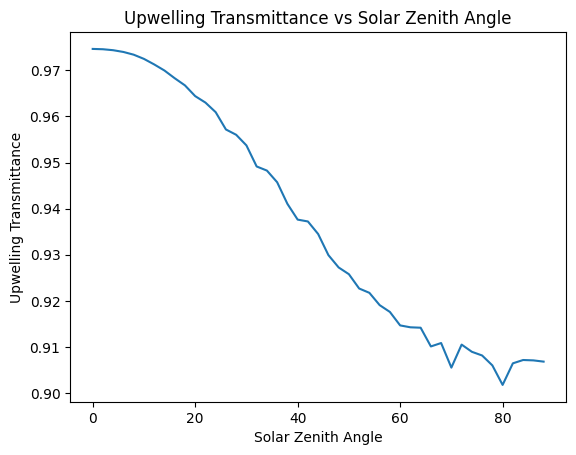

In [94]:
# Plot the downwelling transmittance 
plt.plot(view_zeniths, upwelling_transmittances)
plt.xlabel('Solar Zenith Angle')
plt.ylabel('Upwelling Transmittance')
plt.title('Upwelling Transmittance vs Solar Zenith Angle')

plt.show()